Pre-Processing Data

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
# Step 1: Dealing with Null Values
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley']
train_data.drop(columns=cols_to_drop, inplace=True)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data.fillna(method='ffill', inplace=True)

In [6]:
# Step 2: Feature Selection
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])  # Only consider numeric columns
correlation_matrix = numeric_data.corr()
top_corr_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"]) > 0.5]


In [7]:
# Step 3: Feature Transformation
train_data_encoded = pd.get_dummies(train_data[top_corr_features])
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_encoded)

In [8]:
# Step 4: Feature Engineering
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

In [9]:
# Step 5: Data Splitting
X = train_data_scaled
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
# 1. Training the Model:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# 2. Making Predictions:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [13]:
# 3. Evaluating the Model:
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

In [18]:
# Calculate RMSE 
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)

print(f"Training R^2 Score: {train_score:.4f}")
print(f"Validation R^2 Score: {val_score:.4f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Validation RMSE: {val_rmse:.2f}")

Training R^2 Score: 1.0000
Validation R^2 Score: 1.0000
Training RMSE: 0.00
Validation RMSE: 0.00


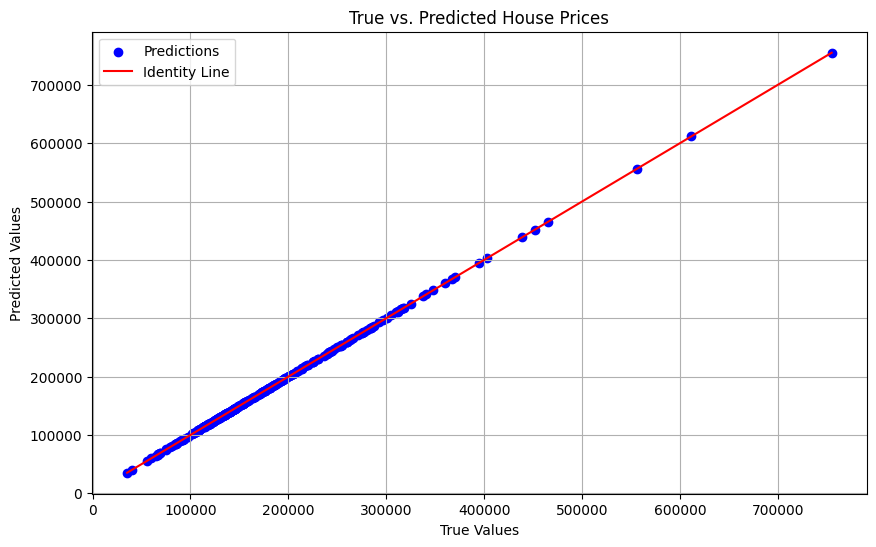

In [19]:
# Plotting true vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_val, color='blue', label='Predictions')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', label='Identity Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()